In [11]:
# Task 2: Check for Missing Values
# Description: Identify and list the columns with missing values and the number of missing values in each.

import pandas as pd

# Step 1: Create sample data with missing values
data = {
    'EmployeeID': [101, 102, 103, 104, 105],
    'Age': [25, 30, None, 28, 45],              # Missing Age for employee 103
    'Salary': [50000, None, 55000, 70000, 60000],  # Missing Salary for employee 102
    'Department': ['HR', 'Finance', 'IT', 'Marketing', None]  # Missing Department for employee 105
}

df = pd.DataFrame(data)

# Step 2: Save the sample data to a CSV file
csv_filename = 'employees.csv'
df.to_csv(csv_filename, index=False)
print(f"Sample CSV file '{csv_filename}' created.")

# Step 3: Load the CSV file
df_loaded = pd.read_csv(csv_filename)

# Step 4: Identify columns with missing values and count them
missing_values = df_loaded.isnull().sum()
missing_columns = missing_values[missing_values > 0]

# Step 5: Display the columns with missing values and their counts
print("\nColumns with missing values and their counts:")
print(missing_columns)


























































Sample CSV file 'employees.csv' created.

Columns with missing values and their counts:
Age           1
Salary        1
Department    1
dtype: int64


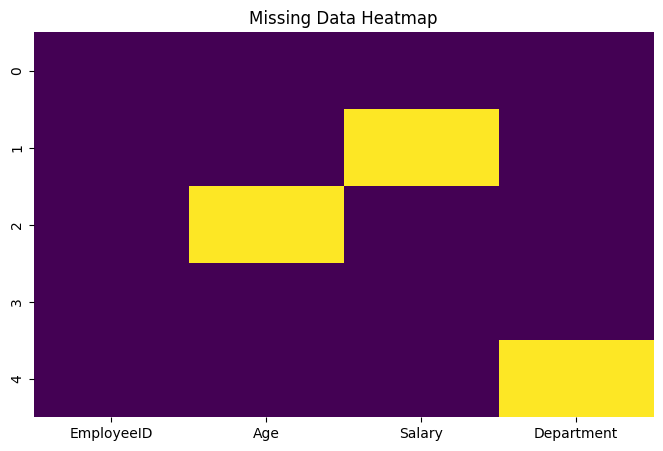

In [12]:
# Task 3: Visualize Missing Data
# Description: Use a heatmap to visualize the missing values in the dataset.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create sample data with missing values
data = {
    'EmployeeID': [101, 102, 103, 104, 105],
    'Age': [25, 30, None, 28, 45],
    'Salary': [50000, None, 55000, 70000, 60000],
    'Department': ['HR', 'Finance', 'IT', 'Marketing', None]
}

df = pd.DataFrame(data)

# Step 2: Visualize missing data with a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=True)
plt.title("Missing Data Heatmap")
plt.show()


In [13]:
# Task 4: Remove Columns with Many Missing Values
# Description: Drop columns that have more than 50% missing values.
import pandas as pd

# Sample data with some columns having many missing values
data = {
    'EmployeeID': [101, 102, 103, 104, 105],
    'Age': [25, 30, None, 28, 45],
    'Salary': [50000, None, 55000, 70000, None],
    'Department': ['HR', None, None, 'Marketing', None],
    'Notes': [None, None, None, None, None]  # Column with 100% missing
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Calculate threshold for dropping columns (50% missing)
threshold = len(df) * 0.5

# Drop columns with missing count greater than threshold
df_cleaned = df.dropna(axis=1, thresh=threshold)

print("\nDataFrame after dropping columns with >50% missing values:")
print(df_cleaned)



Original DataFrame:
   EmployeeID   Age   Salary Department Notes
0         101  25.0  50000.0         HR  None
1         102  30.0      NaN       None  None
2         103   NaN  55000.0       None  None
3         104  28.0  70000.0  Marketing  None
4         105  45.0      NaN       None  None

DataFrame after dropping columns with >50% missing values:
   EmployeeID   Age   Salary
0         101  25.0  50000.0
1         102  30.0      NaN
2         103   NaN  55000.0
3         104  28.0  70000.0
4         105  45.0      NaN


In [14]:
# Task 5: Identify Duplicate Rows
# Description: Check for and display any duplicate rows in the dataset.

import pandas as pd

# Sample data with duplicates
data = {
    'EmployeeID': [101, 102, 103, 102, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'Bob', 'Eve'],
    'Age': [25, 30, 28, 30, 45],
    'Department': ['HR', 'Finance', 'Marketing', 'Finance', 'HR']
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Identify duplicate rows
duplicates = df[df.duplicated(keep=False)]  # keep=False marks all duplicates as True

print("\nDuplicate Rows:")
print(duplicates)


Original DataFrame:
   EmployeeID     Name  Age Department
0         101    Alice   25         HR
1         102      Bob   30    Finance
2         103  Charlie   28  Marketing
3         102      Bob   30    Finance
4         105      Eve   45         HR

Duplicate Rows:
   EmployeeID Name  Age Department
1         102  Bob   30    Finance
3         102  Bob   30    Finance


In [15]:
# Task 6: Remove Duplicate Rows
# Description: Remove duplicate rows from the dataset and verify that they have been removed.

import pandas as pd

# Sample data with duplicates
data = {
    'EmployeeID': [101, 102, 103, 102, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'Bob', 'Eve'],
    'Age': [25, 30, 28, 30, 45],
    'Department': ['HR', 'Finance', 'Marketing', 'Finance', 'HR']
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Remove duplicate rows, keep the first occurrence
df_no_duplicates = df.drop_duplicates()

print("\nDataFrame after removing duplicates:")
print(df_no_duplicates)

# Verify no duplicates remain
print("\nAre there any duplicates left?")
print(df_no_duplicates.duplicated().any())


Original DataFrame:
   EmployeeID     Name  Age Department
0         101    Alice   25         HR
1         102      Bob   30    Finance
2         103  Charlie   28  Marketing
3         102      Bob   30    Finance
4         105      Eve   45         HR

DataFrame after removing duplicates:
   EmployeeID     Name  Age Department
0         101    Alice   25         HR
1         102      Bob   30    Finance
2         103  Charlie   28  Marketing
4         105      Eve   45         HR

Are there any duplicates left?
False


In [16]:
# Task 7: Check Data Inconsistencies
# Description: Identify inconsistencies in categorical columns, such as differing text cases or trailing spaces.

import pandas as pd

# Sample data with inconsistencies
data = {
    'EmployeeID': [101, 102, 103, 104],
    'Department': ['HR', 'finance', 'Finance ', ' hr'],
    'Role': ['Manager', 'Analyst', 'analyst', 'Manager ']
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Check unique values before cleaning
print("\nUnique values in 'Department' before cleaning:")
print(df['Department'].unique())

print("\nUnique values in 'Role' before cleaning:")
print(df['Role'].unique())

# Identify inconsistencies by showing stripped and lowercased versions
df['Department_clean'] = df['Department'].str.strip().str.lower()
df['Role_clean'] = df['Role'].str.strip().str.lower()

print("\nUnique values in 'Department' after cleaning:")
print(df['Department_clean'].unique())

print("\nUnique values in 'Role' after cleaning:")
print(df['Role_clean'].unique())


Original DataFrame:
   EmployeeID Department      Role
0         101         HR   Manager
1         102    finance   Analyst
2         103   Finance    analyst
3         104         hr  Manager 

Unique values in 'Department' before cleaning:
['HR' 'finance' 'Finance ' ' hr']

Unique values in 'Role' before cleaning:
['Manager' 'Analyst' 'analyst' 'Manager ']

Unique values in 'Department' after cleaning:
['hr' 'finance']

Unique values in 'Role' after cleaning:
['manager' 'analyst']


In [17]:
# Task 8: Get Summary of Data Quality
# Description: Generate a summary of data quality including total records, number of duplicate rows, and columns with missing values.

import pandas as pd

# Sample data for demonstration; replace with your dataset loading
data = {
    'EmployeeID': [101, 102, 103, 104, 104],
    'Age': [25, 30, None, 22, 22],
    'Department': ['HR', 'Finance', 'Finance', None, None]
}

df = pd.DataFrame(data)

# Total number of records
total_records = len(df)

# Number of duplicate rows
duplicate_rows = df.duplicated().sum()

# Columns with missing values and their counts
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print(f"Total Records: {total_records}")
print(f"Number of Duplicate Rows: {duplicate_rows}")
print("Columns with Missing Values:")
print(missing_columns)


Total Records: 5
Number of Duplicate Rows: 1
Columns with Missing Values:
Age           1
Department    2
dtype: int64


In [18]:
# Task 9: Generate a Data Quality Report
# Description: Create a comprehensive data quality report that includes not only missing values but also basic statistics for numerical columns and the distribution of categorical columns.


import pandas as pd

# Sample data - replace with your own CSV file if needed
data = {
    'EmployeeID': [101, 102, 103, 104, 105],
    'Age': [25, 30, None, 22, 28],
    'Department': ['HR', 'Finance', 'Finance', None, 'HR'],
    'Salary': [50000, 60000, 55000, 52000, None]
}

df = pd.DataFrame(data)

# 1. Missing values per column
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)
print("\n" + "-"*40)

# 2. Basic statistics for numerical columns
print("Numerical Columns Statistics:")
print(df.describe())
print("\n" + "-"*40)

# 3. Distribution of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Categorical Columns Distribution:")
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts(dropna=False))

Missing Values per Column:
EmployeeID    0
Age           1
Department    1
Salary        1
dtype: int64

----------------------------------------
Numerical Columns Statistics:
       EmployeeID    Age       Salary
count    5.000000   4.00      4.00000
mean   103.000000  26.25  54250.00000
std      1.581139   3.50   4349.32945
min    101.000000  22.00  50000.00000
25%    102.000000  24.25  51500.00000
50%    103.000000  26.50  53500.00000
75%    104.000000  28.50  56250.00000
max    105.000000  30.00  60000.00000

----------------------------------------
Categorical Columns Distribution:

Value counts for 'Department':
Department
HR         2
Finance    2
None       1
Name: count, dtype: int64


In [19]:
# Task 10: Advanced Data Imputation
# Description: Perform advanced data imputation by replacing missing values in numerical columns with the mean and categorical columns with the mode.


import pandas as pd
import numpy as np

# Sample data (replace with your dataset)
data = {
    'EmployeeID': [101, 102, 103, 104, 105],
    'Age': [25, 30, None, 22, 28],
    'Department': ['HR', 'Finance', 'Finance', None, 'HR'],
    'Salary': [50000, 60000, 55000, 52000, None]
}

df = pd.DataFrame(data)

print("Original Data with Missing Values:")
print(df)

# Separate columns by type
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
for col in num_cols:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)

# Impute categorical columns with mode
for col in cat_cols:
    mode_val = df[col].mode()
    if not mode_val.empty:
        df[col].fillna(mode_val[0], inplace=True)

print("\nData after Imputation:")
print(df)


Original Data with Missing Values:
   EmployeeID   Age Department   Salary
0         101  25.0         HR  50000.0
1         102  30.0    Finance  60000.0
2         103   NaN    Finance  55000.0
3         104  22.0       None  52000.0
4         105  28.0         HR      NaN

Data after Imputation:
   EmployeeID    Age Department   Salary
0         101  25.00         HR  50000.0
1         102  30.00    Finance  60000.0
2         103  26.25    Finance  55000.0
3         104  22.00    Finance  52000.0
4         105  28.00         HR  54250.0
